In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy.stats import chi2_contingency
from IPython.display import display, HTML
from scipy.stats import ks_2samp
from sklearn.preprocessing import StandardScaler


In [20]:

df_freMTPL = pd.read_csv("/home/onyxia/work/Federated_Learning_Milliman/data/french_data.csv")
df_beMTPL = pd.read_csv("/home/onyxia/work/Federated_Learning_Milliman/data/belgium_data.csv")
df_euMTPL = pd.read_csv("/home/onyxia/work/Federated_Learning_Milliman/data/european_data.csv")

In [21]:
# Étape 1 : Ajouter une colonne d'identification
df_freMTPL['Country'] = 'French'
df_beMTPL['Country'] = 'Belgium'
df_euMTPL['Country'] = 'European'


In [22]:
data = pd.concat([df_freMTPL, df_euMTPL, df_beMTPL], ignore_index=True)
data

,Exposure,Power,DriverAge,Fuel_type,Density,Sex,Sinistre,Country
0,0.09,43,46,1,76.0,0,0,French
1,0.84,43,46,1,76.0,1,0,French
2,0.52,40,38,0,3003.0,1,0,French
3,0.45,40,38,0,3003.0,1,0,French
4,0.15,43,41,1,60.0,0,0,French
...,...,...,...,...,...,...,...,...
3627586,1.00,40,37,1,259.0,1,0,Belgium
3627587,1.00,55,44,1,259.0,1,0,Belgium
3627588,1.00,40,50,1,259.0,1,0,Belgium
3627589,1.00,66,43,0,259.0,1,0,Belgium


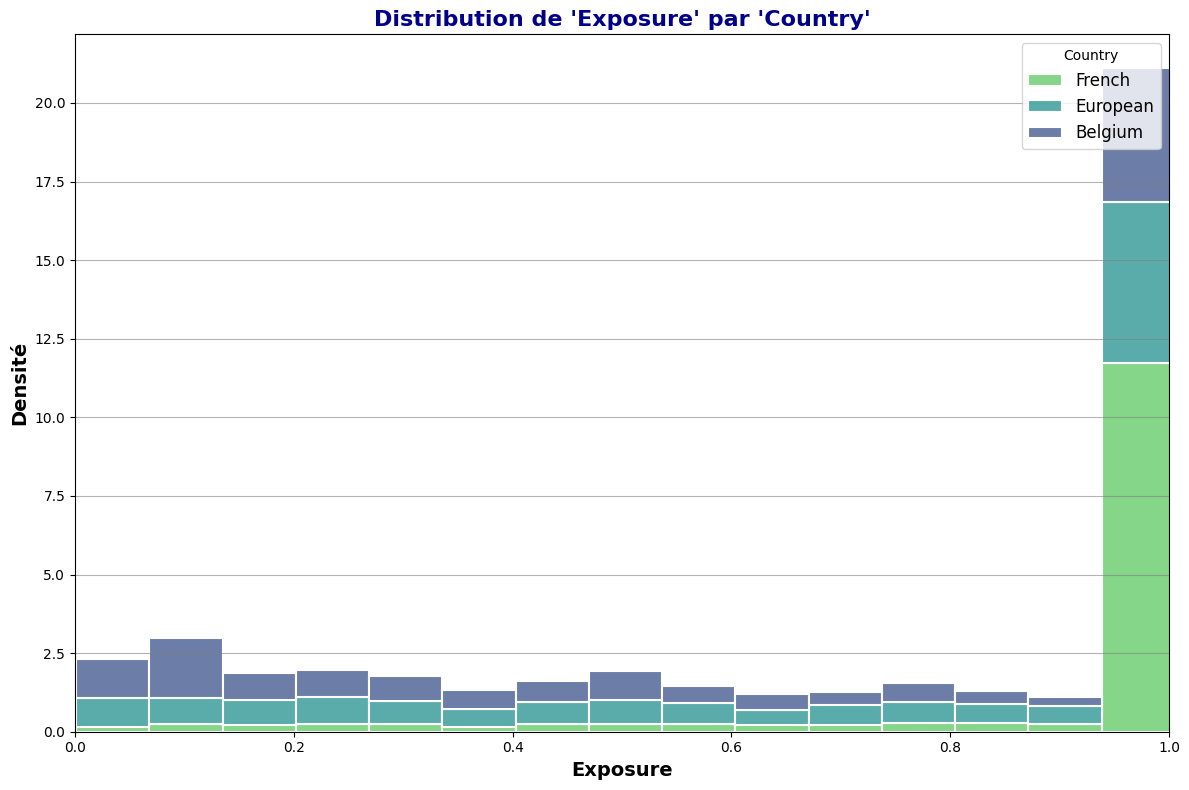

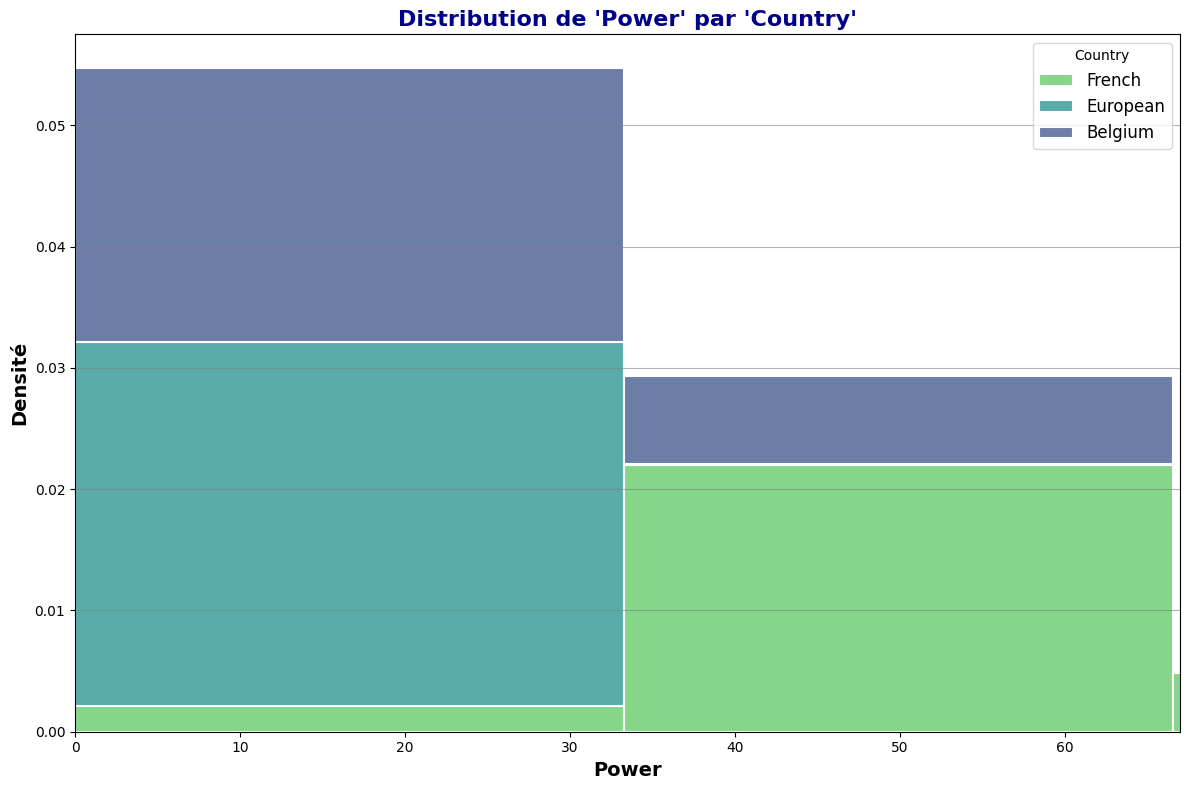

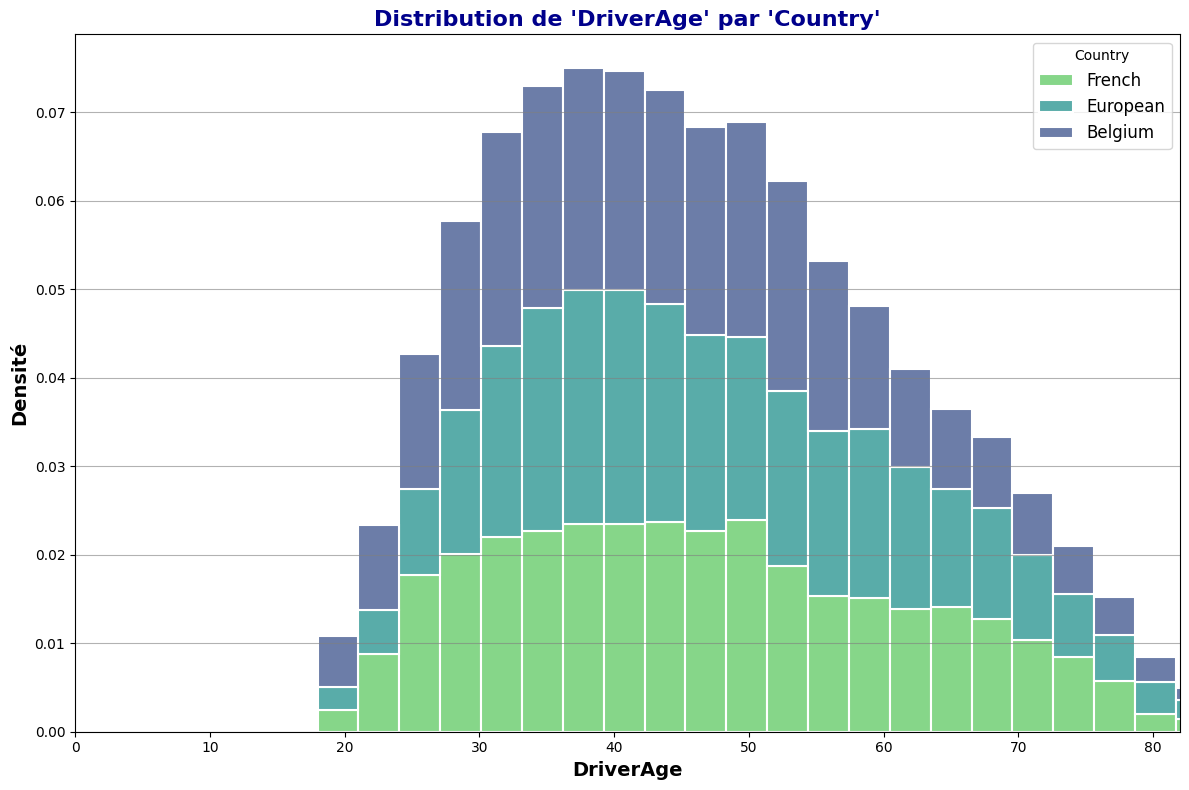

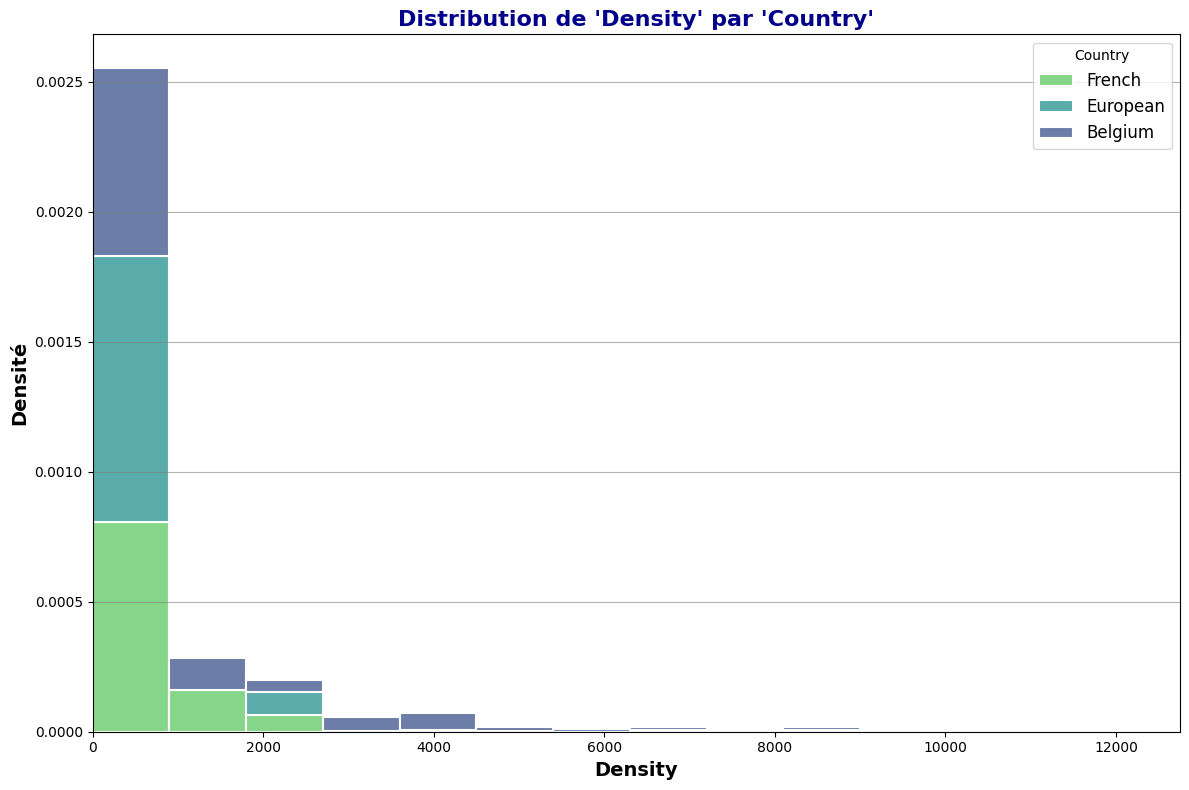

In [23]:
def plot_histograms_zoomed(df, group_col='Country', threshold_quantile=0.99, bins=30):
    # Colonnes interdites d'être plottées
    excluded_columns = ['Sex', 'Fuel_type', 'Sinistre', group_col]
    
    # Sélectionner les colonnes numériques uniquement
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

    # Retirer les colonnes à exclure (même si elles sont numériques par accident)
    numeric_cols = [col for col in numeric_cols if col not in excluded_columns]

    for variable in numeric_cols:
        # Nettoyage : retirer les NaN pour la variable + group_col
        temp_df = df[[variable, group_col]].dropna()

        # Calcul automatique de la limite de zoom
        max_x = temp_df[variable].quantile(threshold_quantile)

        # Création du graphique
        plt.figure(figsize=(12, 8))
        sns.histplot(
            data=temp_df,
            x=variable,
            hue=group_col,
            multiple='stack',     
            stat='density',       
            common_norm=False,    
            bins=bins,
            palette='viridis',    
            edgecolor='white',    
            linewidth=1.5
        )
        
        # Ajouter des éléments esthétiques
        plt.title(f"Distribution de '{variable}' par '{group_col}'", fontsize=16, fontweight='bold', color='darkblue')
        plt.xlabel(variable, fontsize=14, fontweight='bold')
        plt.ylabel('Densité', fontsize=14, fontweight='bold')
        plt.xlim(0, max_x)
        plt.grid(axis='y', linestyle='-', alpha=0.6, color='grey')

        # Ajouter une légende des pays
        plt.legend(title=group_col, loc='upper right', fontsize=12, labels=temp_df[group_col].unique())

        plt.tight_layout()
        plt.show()

plot_histograms_zoomed(data)  

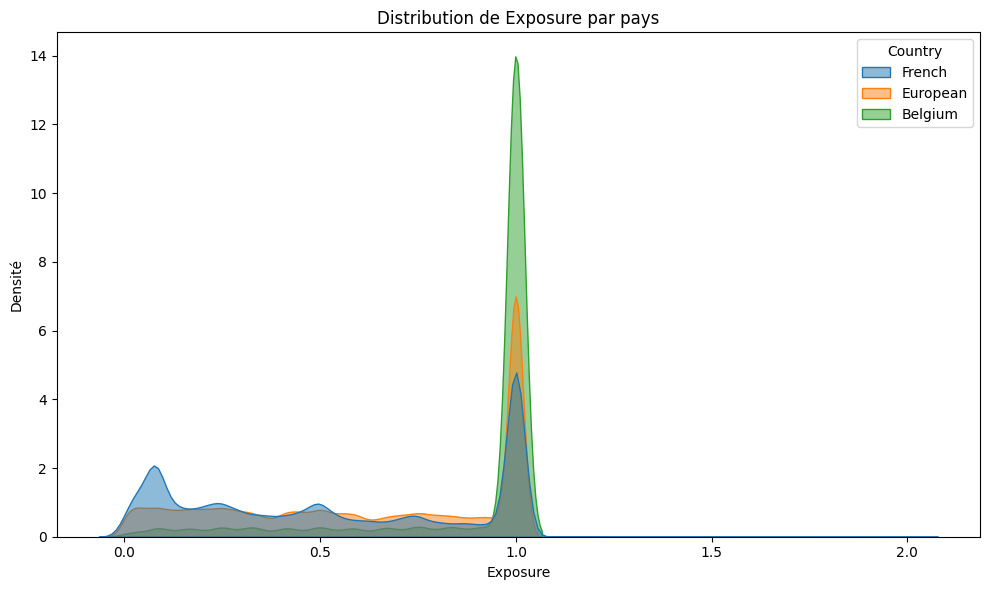

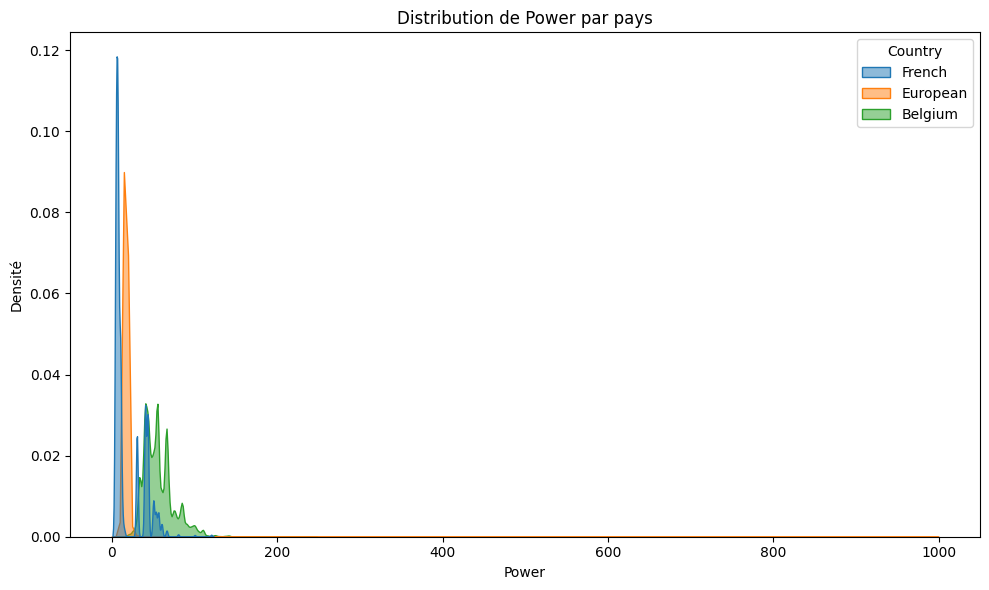

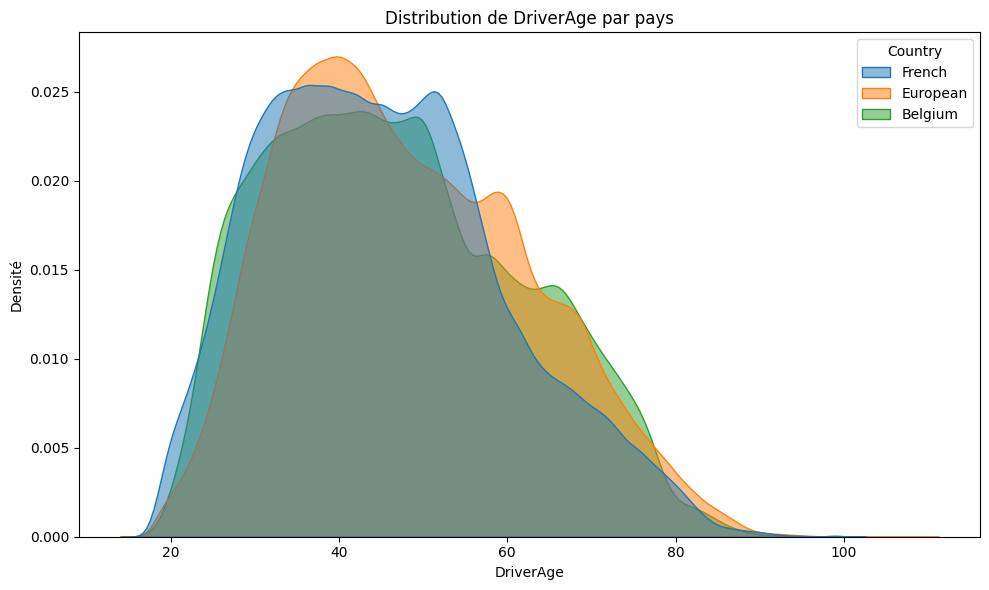

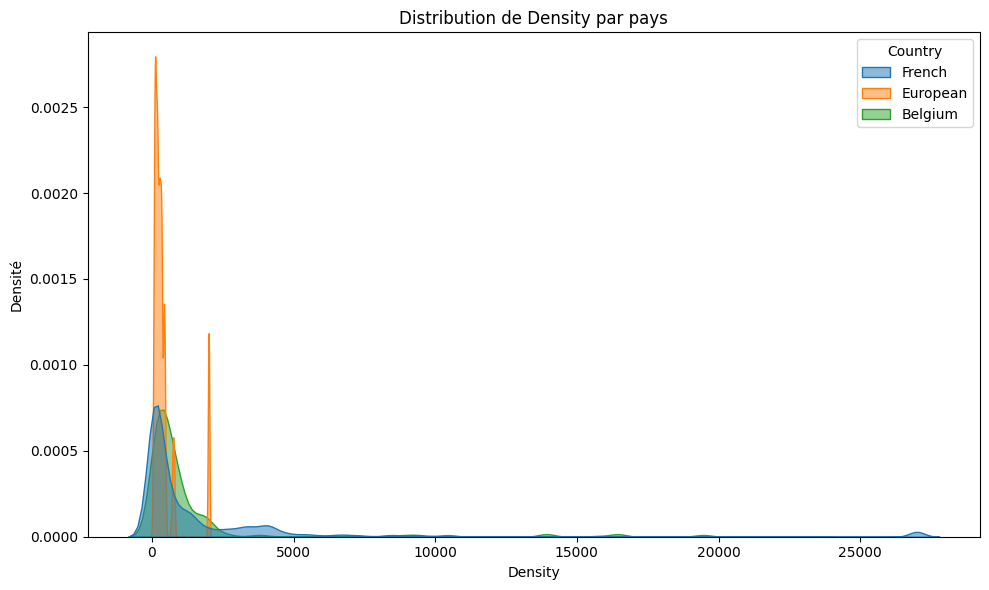

In [24]:
def plot_kde_by_country(df, country_col='Country'):
    # Variables à exclure car ce sont des catégorielles même si elles sont numériques
    categorical_numerics = ['Sinistre', 'Sex', 'Fuel_type']

    # Sélection des variables numériques sans les variables catégorielles ni le pays
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    numeric_cols = [col for col in numeric_cols if col not in categorical_numerics + [country_col]]

    # Boucle sur chaque variable numérique "continue"
    for col in numeric_cols:
        plt.figure(figsize=(10, 6))
        sns.kdeplot(data=df, x=col, hue=country_col, fill=True, common_norm=False, alpha=0.5)
        plt.title(f'Distribution de {col} par pays')
        plt.xlabel(col)
        plt.ylabel('Densité')
        plt.tight_layout()
        plt.show()

plot_kde_by_country(data)


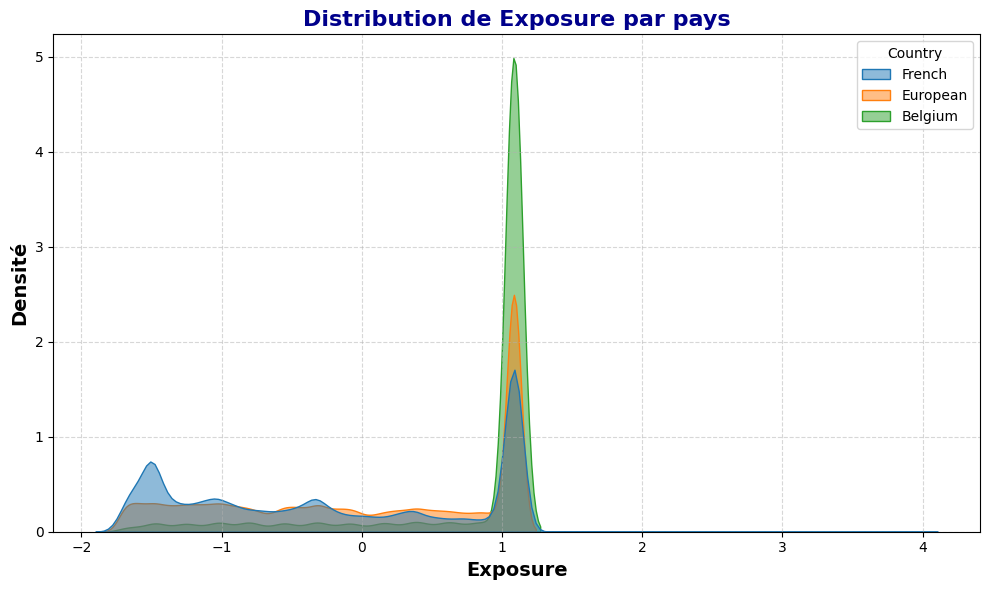

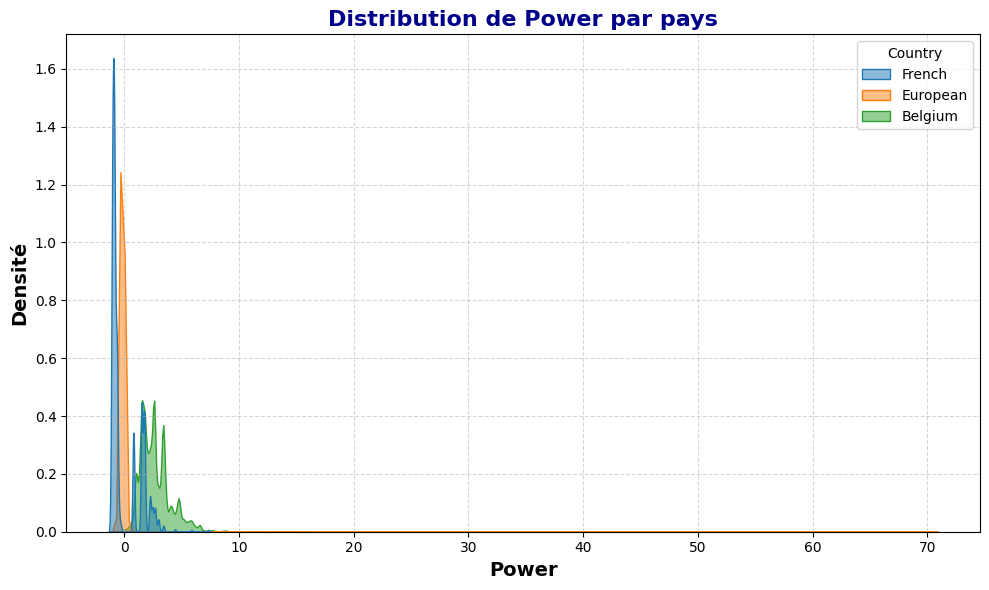

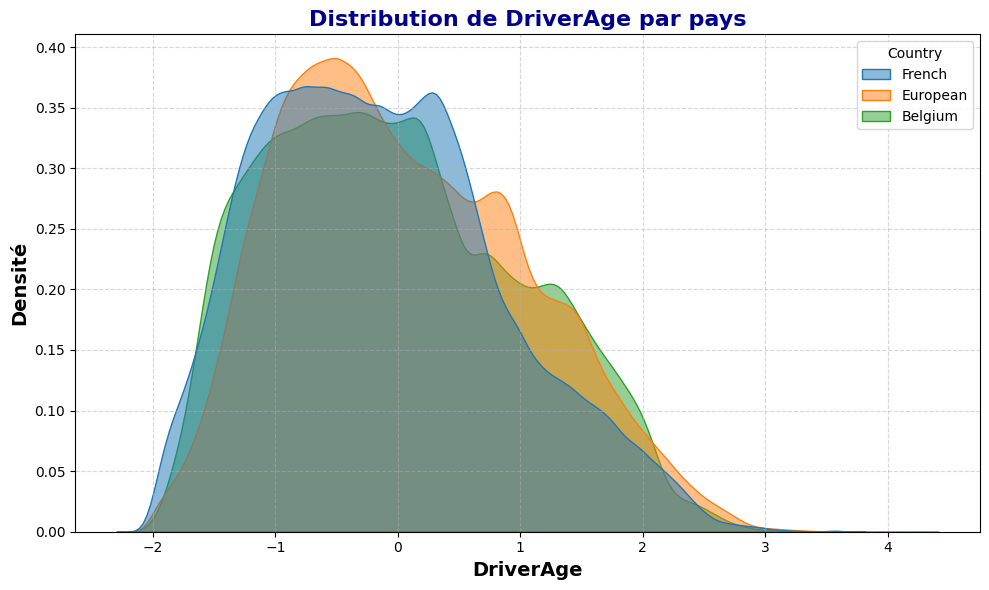

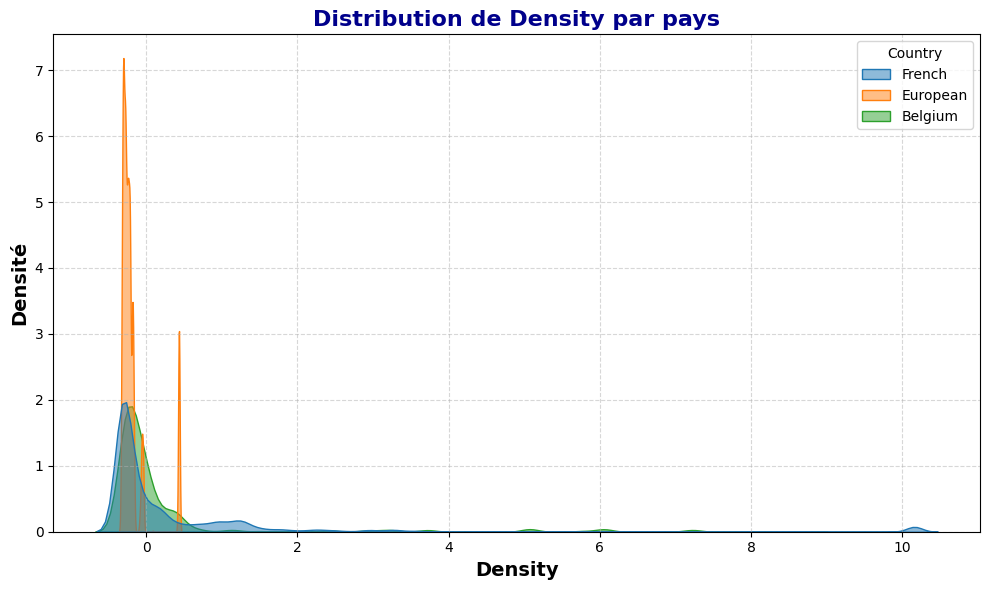

In [25]:
def plot_kde_by_country(df, country_col='Country'):
    # Variables à exclure car ce sont des catégorielles même si elles sont numériques
    categorical_numerics = ['Sinistre', 'Sex', 'Fuel_type']
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    numeric_cols = [col for col in numeric_cols if col not in categorical_numerics + [country_col]]
    scaler = StandardScaler()

    # Boucle sur chaque variable numérique "continue"
    for col in numeric_cols:
        # Extraire la colonne et appliquer un nettoyage pour enlever les NaN
        temp_df = df[[col, country_col]].dropna()

        # Appliquer le standard scaling pour centrer les données autour de 0 et les mettre à la même échelle
        temp_df[col] = scaler.fit_transform(temp_df[[col]])

    
        plt.figure(figsize=(10, 6))
        sns.kdeplot(data=temp_df, x=col, hue=country_col, fill=True, common_norm=False, alpha=0.5)
        
    
        plt.title(f'Distribution de {col} par pays', fontsize=16, fontweight='bold', color='darkblue')
        plt.xlabel(f'{col}', fontsize=14, fontweight='bold')
        plt.ylabel('Densité', fontsize=14, fontweight='bold')
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()
plot_kde_by_country(data) 


/tmp/ipykernel_42639/4084543786.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


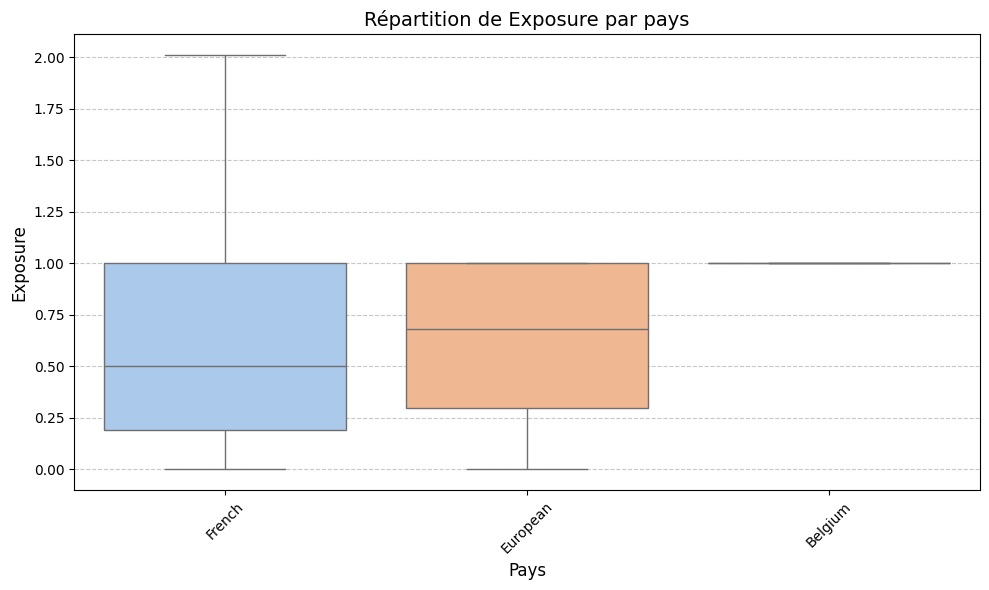

/tmp/ipykernel_42639/4084543786.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


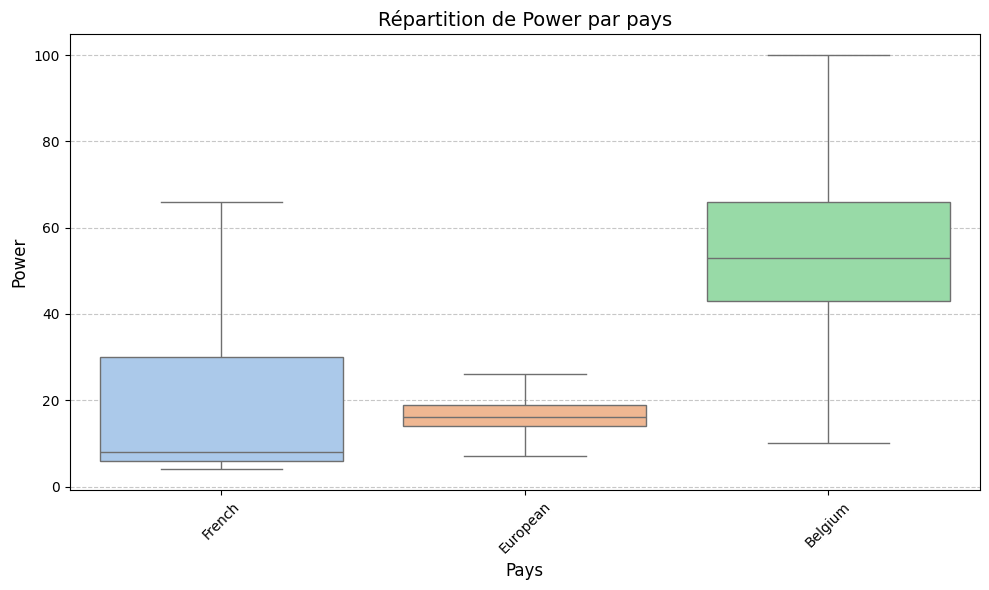

/tmp/ipykernel_42639/4084543786.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


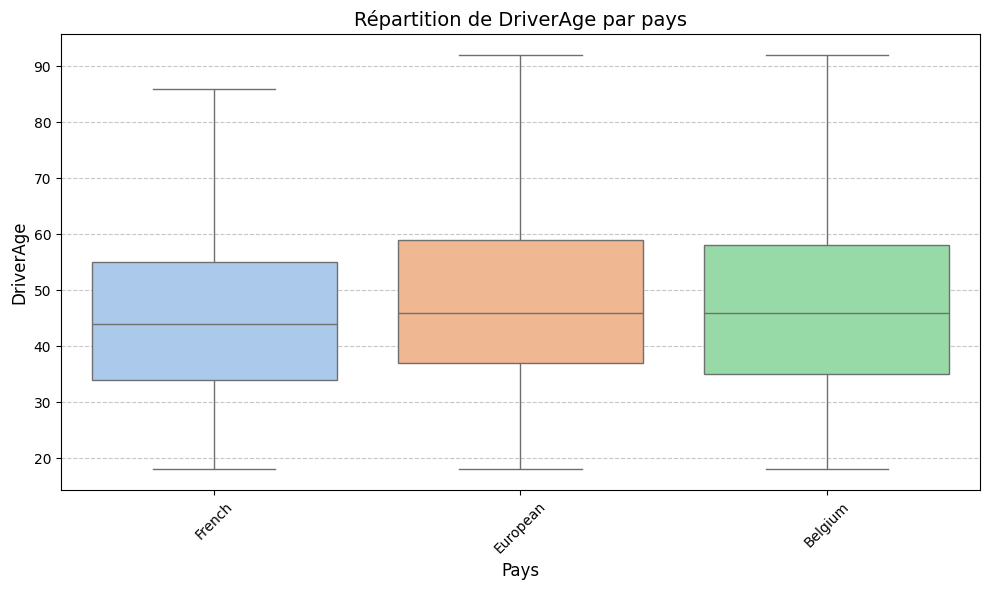

/tmp/ipykernel_42639/4084543786.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


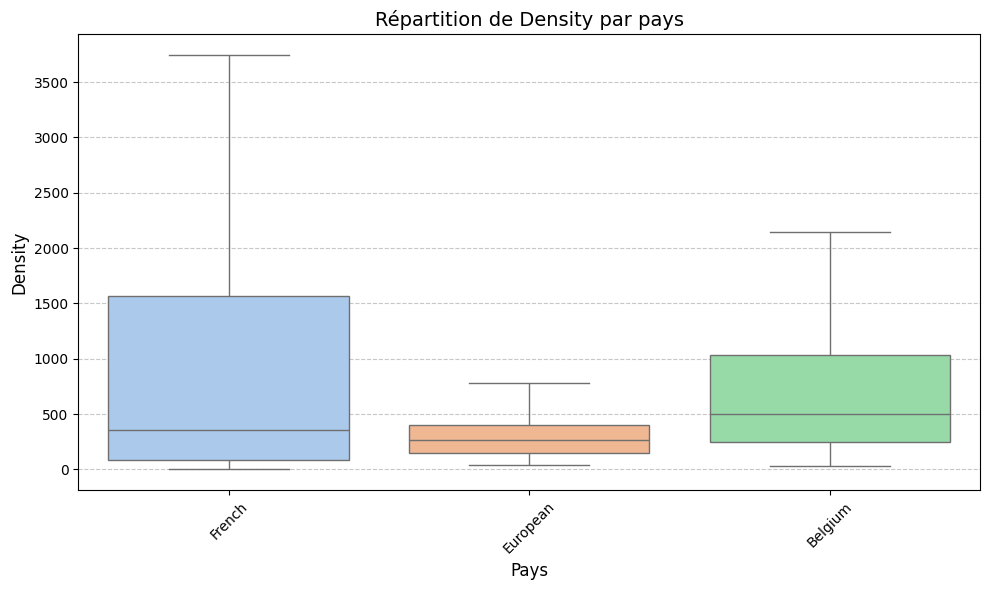

In [26]:
def plot_boxplots_by_country(df, country_col='Country'):
    # Variables à exclure car elles sont catégorielles même si elles sont numériques
    categorical_numerics = ['Sinistre', 'Sex', 'Fuel_type']

    # Sélection des colonnes numériques pertinentes
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    numeric_cols = [col for col in numeric_cols if col not in categorical_numerics + [country_col]]

    # Boucle sur chaque variable continue
    for col in numeric_cols:
        plt.figure(figsize=(10, 6))
        sns.boxplot(
            data=df,
            x=country_col,
            y=col,
            palette='pastel',
            showfliers=False  # Cache les outliers pour rendre plus lisible (optionnel)
        )
        plt.title(f"Répartition de {col} par pays", fontsize=14)
        plt.xlabel('Pays', fontsize=12)
        plt.ylabel(col, fontsize=12)
        plt.xticks(rotation=45)  # Rotation pour éviter le chevauchement si beaucoup de pays
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
plot_boxplots_by_country(data)

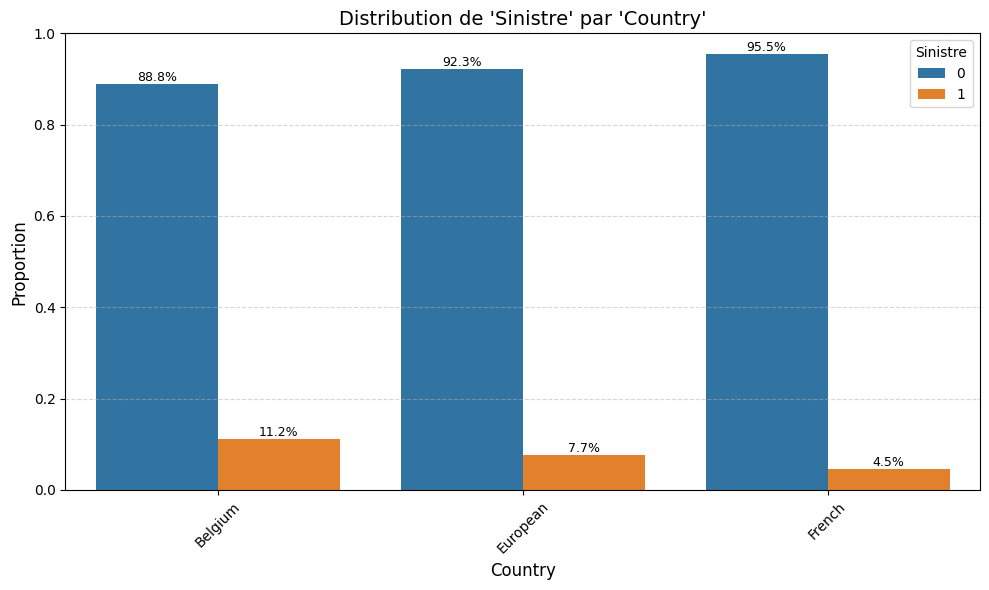

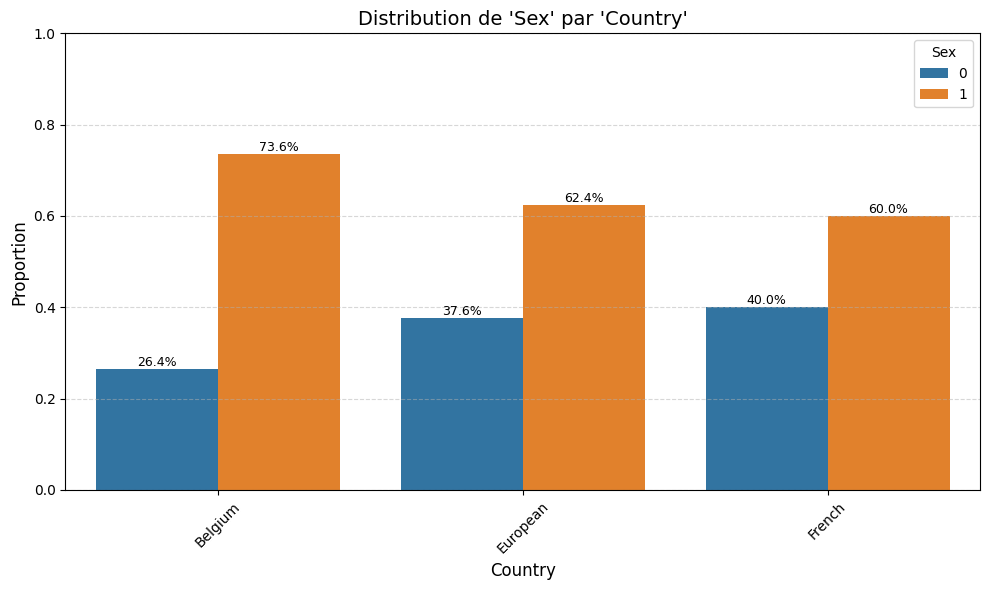

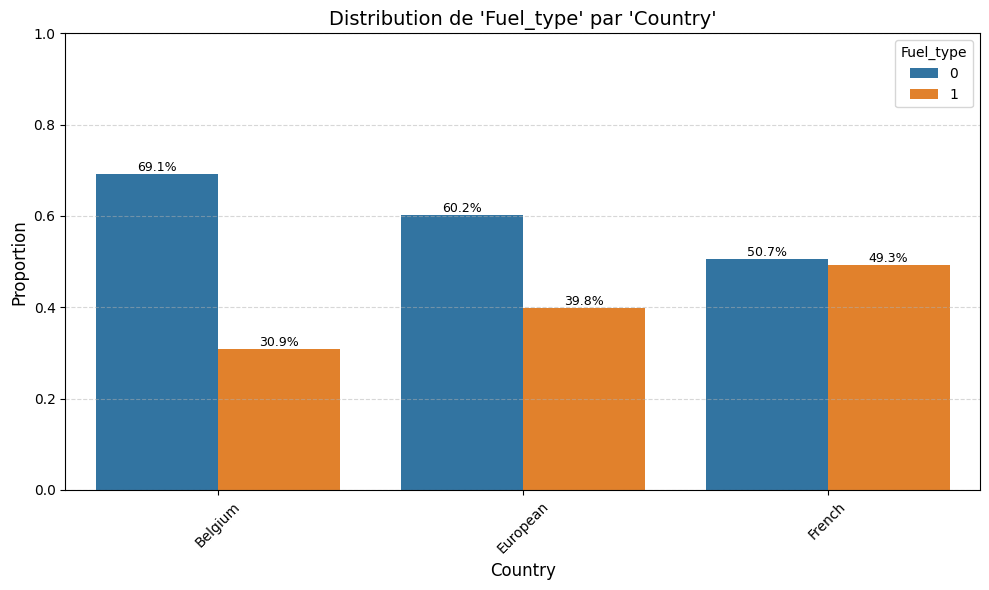

In [27]:
def plot_multiple_proportions(df, group_col='Country', target_cols=None):
    if target_cols is None:
        raise ValueError("Merci de spécifier les colonnes cibles via target_cols.")
    
    for target in target_cols:
        # Vérifier que les colonnes existent dans le DataFrame
        if target not in df.columns or group_col not in df.columns:
            print(f"Attention : '{target}' ou '{group_col}' n'existe pas dans le DataFrame.")
            continue

        # Préparation des données
        counts = (
            df.groupby([group_col, target])
            .size()
            .reset_index(name='Count')
        )
        totals = (
            df.groupby(group_col)
            .size()
            .reset_index(name='Total')
        )
        merged = counts.merge(totals, on=group_col)
        merged['Proportion'] = merged['Count'] / merged['Total']

        # Tracé
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(
            data=merged,
            x=group_col,
            y='Proportion',
            hue=target
            
        )

        # Ajout des labels de pourcentage
        for container in ax.containers:
            labels = [f"{v*100:.1f}%" if v > 0 else '' for v in container.datavalues]
            ax.bar_label(
                container,
                labels=labels,
                label_type='edge',
                fontsize=9
            )

        plt.ylim(0, 1)
        plt.title(f"Distribution de '{target}' par '{group_col}'", fontsize=14)
        plt.xlabel(group_col, fontsize=12)
        plt.ylabel('Proportion', fontsize=12)
        plt.xticks(rotation=45)
        plt.legend(title=target, loc='best')
        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

# Liste des variables catégorielles à analyser
cat_vars = ['Sinistre', 'Sex', 'Fuel_type']
plot_multiple_proportions(data, group_col='Country', target_cols=cat_vars)


# Distribution de chaque variable

In [28]:
def afficher_repartition_sinistres(data, colonne="Sinistre", palette=["cyan", "red"], figsize=(6, 4)):
    class_distribution = data[colonne].value_counts(normalize=True) * 100

    plt.figure(figsize=figsize)
    sns.barplot(x=class_distribution.index, y=class_distribution.values, palette=palette)
    plt.xlabel(f"Classe {colonne} (0 = Pas de sinistre, 1 = Sinistre)")
    plt.ylabel("Proportion (%)")
    plt.title("Répartition des sinistres dans le dataset")
    plt.xticks([0, 1], ["Pas de sinistre", "Sinistre"])
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()


In [29]:
# Style plus joli pour les plots
sns.set(style='whitegrid')


KeyboardInterrupt: 

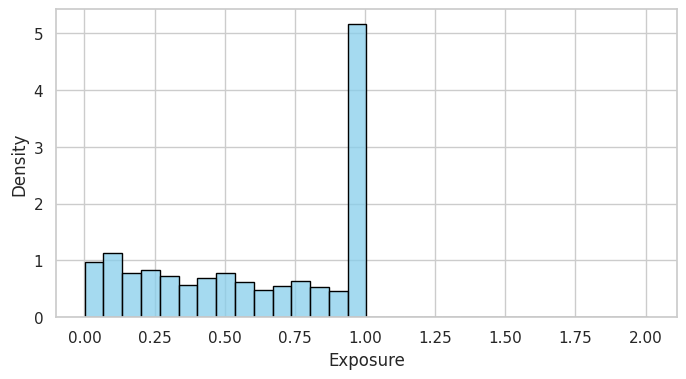

In [30]:
# Exemple de couleurs pour chaque variable
hist_colors = ['skyblue', 'lightgreen', 'salmon', 'plum']
kde_colors = ['blue', 'green', 'red', 'purple']

numerical_vars = ['Exposure', 'Power', 'DriverAge', 'Density']

for i, var in enumerate(numerical_vars):
    plt.figure(figsize=(8, 4))
    
    # Histogramme sans la courbe KDE
    sns.histplot(data[var], bins=30, color=hist_colors[i], stat="density", edgecolor="black", kde=False)
    
    # Ajout de la courbe KDE avec une couleur différente
    sns.kdeplot(data[var], color=kde_colors[i], linewidth=2)
    
    plt.title(f'Distribution de {var}')
    plt.xlabel(var)
    plt.ylabel("Densité")
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_39994/3569974643.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=data, palette=palettes[i])


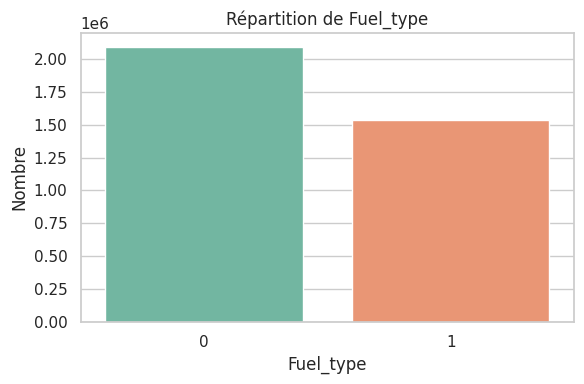

/tmp/ipykernel_39994/3569974643.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=data, palette=palettes[i])


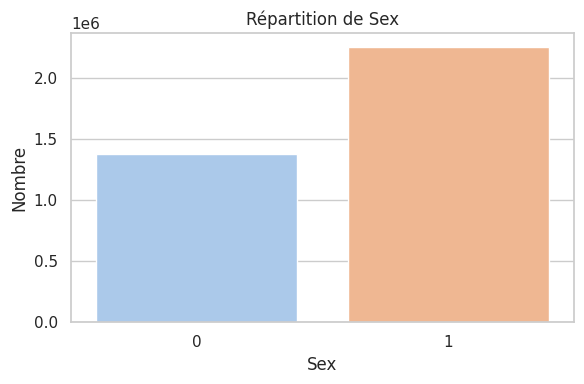

/tmp/ipykernel_39994/3569974643.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=data, palette=palettes[i])


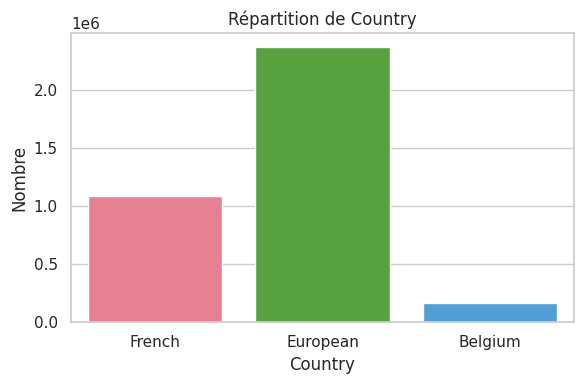

In [ ]:
categorical_vars = ['Fuel_type', 'Sex', 'Country']

# Quelques palettes différentes de Seaborn
palettes = ['Set2', 'pastel', 'husl', 'muted']

for i, var in enumerate(categorical_vars):
    plt.figure(figsize=(6, 4))
    sns.countplot(x=var, data=data, palette=palettes[i])
    plt.title(f'Répartition de {var}')
    plt.xlabel(var)
    plt.ylabel("Nombre")
    plt.tight_layout()
    plt.show()


In [ ]:
def analyse_variable_numerique(df, var_num, cible='Sinistre'):
    print(f"## Analyse de la variable numérique : {var_num}\n")
    
    # Statistiques descriptives
    display(df[[var_num]].describe())

    # Boxplot par classe
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=cible, y=var_num, data=df, palette='Set2')
    plt.title(f'{var_num} selon {cible}')
    plt.grid(True)
    plt.show()

    # Distribution KDE
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=df, x=var_num, hue=cible, common_norm=False, fill=True)
    plt.title(f'Distribution de {var_num} selon {cible}')
    plt.grid(True)
    plt.show()

        # Test de Kolmogorov-Smirnov
    groupe_0 = df[df[cible] == 0][var_num].dropna()
    groupe_1 = df[df[cible] == 1][var_num].dropna()
    ks_stat, p_value = ks_2samp(groupe_0, groupe_1)

    print("\n" + "="*60)
    print(f"🧪 Test de Kolmogorov-Smirnov sur la variable '{var_num}'")
    print("-" * 60)
    print(f"📈 Statistique KS : {ks_stat:.4f}")
    print(f"📊 Valeur p       : {p_value:.4e}")

    # Interprétation statistique
    if p_value < 0.05:
        print("✅ Résultat : Les distributions sont **significativement différentes** (p < 0.05)")
    else:
        print("❌ Résultat : Aucune différence significative détectée (p ≥ 0.05)")

    # Interprétation de l'intensité de la différence
    if ks_stat < 0.1:
        intensite = "⚪️ Très faible différence"
    elif ks_stat < 0.2:
        intensite = "🟢 Faible différence"
    elif ks_stat < 0.3:
        intensite = "🟠 Différence modérée"
    else:
        intensite = "🔴 Forte différence"

    print(f"📌 Intensité de l'écart : {intensite}")

    # Différence de médiane
    med_0 = groupe_0.median()
    med_1 = groupe_1.median()
    diff_medianes = abs(med_0 - med_1)

    print("-" * 60)
    print(f"📉 Médiane (classe 0) : {med_0:.2f}")
    print(f"📈 Médiane (classe 1) : {med_1:.2f}")
    print(f"➡️  Différence absolue de médiane : {diff_medianes:.2f}")
    print("="*60 + "\n")



In [ ]:
def analyse_variable_categorielle(df, var_cat, cible='Sinistre'):
    print(f"## Analyse de la variable catégorielle : {var_cat}\n")
    
    # Calcul du taux de sinistre + nombre d'observations + sinistres
    stats = df.groupby(var_cat).agg(
        Effectif=(cible, 'count'),
        Nombre_sinistres=(cible, 'sum'),
        Taux_de_sinistre=(cible, 'mean')
    ).sort_values(by='Taux_de_sinistre', ascending=False).reset_index()

    # Affichage stylisé
    display(stats.style
            .format({'Taux_de_sinistre': '{:.2%}'})
            .background_gradient(cmap='Reds', subset=['Taux_de_sinistre'])
            .set_caption(f"Taux de sinistre par '{var_cat}'"))

    # Diagramme en barres verticales
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(data=df, x=var_cat, hue=cible, palette='Set2')
    plt.title(f'Distribution de {var_cat} selon {cible}')
    plt.xticks(rotation=90)  # Modalités affichées verticalement
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()


# Corrélation 

In [ ]:
def afficher_correlation(data, variables, figsize=(7, 5), cmap="coolwarm"):
    corr_matrix = data[variables].corr()

    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt=".2f")
    plt.title("Corrélations entre variables numériques")
    plt.tight_layout()
    plt.show()


In [ ]:
def analyze_categorical_correlation(data, cat_vars=['Fuel_type','Sinistre', 'Sex'], 
                                   alpha=0.05, figsize=(10, 8)):
   
    # Préparation des données
    cat_df = data[cat_vars].copy()
    for col in cat_df.select_dtypes(include='bool'):
        cat_df[col] = cat_df[col].astype(str)
    
    # Calcul des résultats
    results = []
    for i, var1 in enumerate(cat_vars[:-1]):
        for var2 in cat_vars[i+1:]:
            contingency_table = pd.crosstab(cat_df[var1], cat_df[var2])
            chi2, p, dof, _ = chi2_contingency(contingency_table)
            
            # Calcul du Cramer's V
            n = contingency_table.sum().sum()
            cramer_v = np.sqrt(chi2 / (n * min(contingency_table.shape[0]-1, contingency_table.shape[1]-1)))
            
            # Interprétation
            strength = "Très forte" if cramer_v >= 0.5 else \
                     "Forte" if cramer_v >= 0.3 else \
                     "Modérée" if cramer_v >= 0.1 else "Faible"
            
            results.append({
                'Paire de variables': f"{var1} - {var2}",
                'Cramer\'s V': cramer_v,
                'Force de la corrélation': strength,
                'p-value': p,
                'Significatif': p < alpha
            })
    
    # Création du DataFrame de résultats
    results_df = pd.DataFrame(results)
    
    # Style pour la visualisation
    def color_strength(val):
        color = 'white'
        if val == "Très forte": color = '#FF0000'  # Rouge
        elif val == "Forte": color = '#FF6666'     # Rouge clair
        elif val == "Modérée": color = '#FFCCCC'   # Rouge très clair
        return f'background-color: {color}'
    
    def color_pvalue(val):
        color = 'limegreen' if val < alpha else 'lightcoral'
        return f'color: {color}; font-weight: bold'
    
    # Application du style
    styled_df = results_df.style \
        .applymap(color_pvalue, subset=['p-value']) \
        .applymap(lambda x: 'background-color: limegreen' if x else 'background-color: lightcoral', 
                 subset=['Significatif']) \
        .applymap(color_strength, subset=['Force de la corrélation']) \
        .format({
            'Cramer\'s V': "{:.3f}",
            'p-value': "{:.4f}"
        }) \
        .set_caption("Résultats des tests de corrélation entre variables catégorielles") \
        .set_properties(**{
            'text-align': 'center',
            'font-size': '12pt',
            'border': '1px solid black'
        })
    
    # Affichage dans Jupyter
    display(styled_df)
    return results_df


/tmp/ipykernel_39994/468140148.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette=palette)


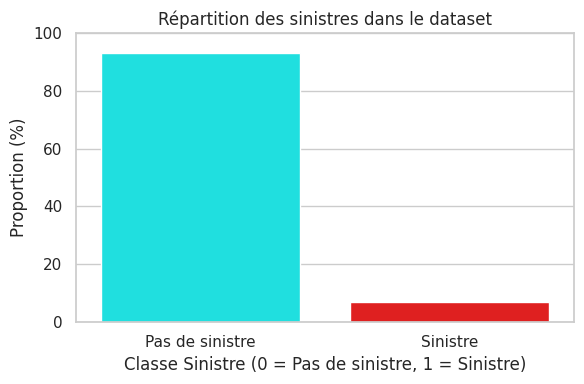

## Analyse de la variable numérique : Exposure



,Exposure
count,3.627591e+06
mean,6.126826e-01
std,3.566156e-01
min,1.000000e-03
25%,2.700000e-01
50%,6.600000e-01
75%,1.000000e+00
max,2.010000e+00


/tmp/ipykernel_39994/639353739.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cible, y=var_num, data=df, palette='Set2')


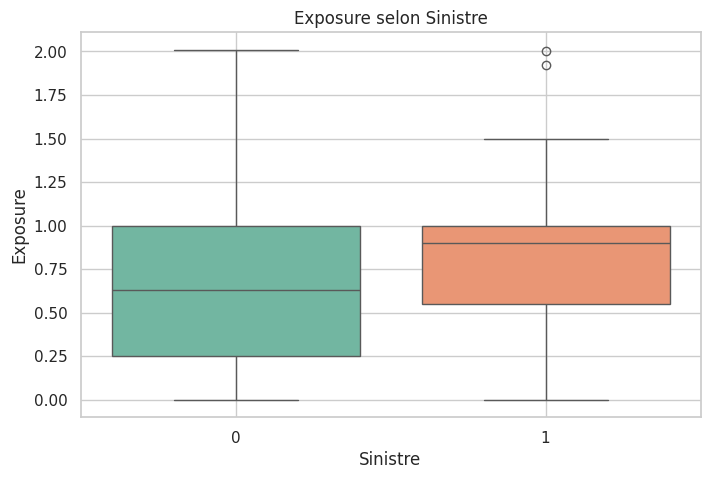

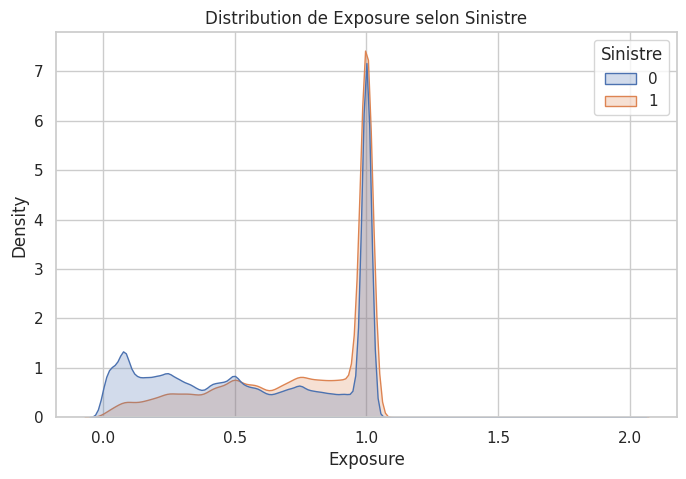


🧪 Test de Kolmogorov-Smirnov sur la variable 'Exposure'
------------------------------------------------------------
📈 Statistique KS : 0.2059
📊 Valeur p       : 0.0000e+00
✅ Résultat : Les distributions sont **significativement différentes** (p < 0.05)
📌 Intensité de l'écart : 🟠 Différence modérée
------------------------------------------------------------
📉 Médiane (classe 0) : 0.63
📈 Médiane (classe 1) : 0.90
➡️  Différence absolue de médiane : 0.27

## Analyse de la variable numérique : Power



,Power
count,3.627591e+06
mean,1.876786e+01
std,1.382461e+01
min,0.000000e+00
25%,1.200000e+01
50%,1.600000e+01
75%,2.000000e+01
max,9.990000e+02


/tmp/ipykernel_39994/639353739.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cible, y=var_num, data=df, palette='Set2')


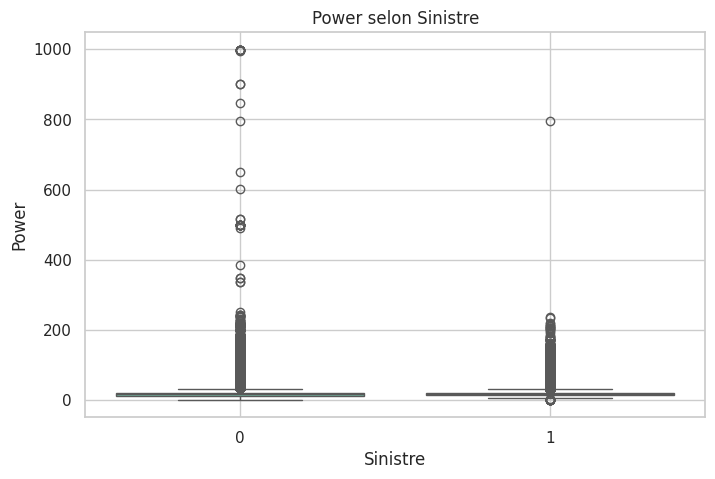

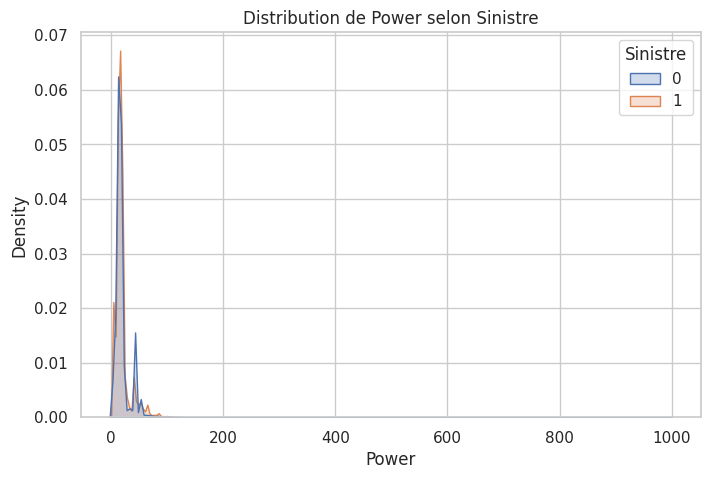


🧪 Test de Kolmogorov-Smirnov sur la variable 'Power'
------------------------------------------------------------
📈 Statistique KS : 0.0753
📊 Valeur p       : 0.0000e+00
✅ Résultat : Les distributions sont **significativement différentes** (p < 0.05)
📌 Intensité de l'écart : ⚪️ Très faible différence
------------------------------------------------------------
📉 Médiane (classe 0) : 16.00
📈 Médiane (classe 1) : 16.00
➡️  Différence absolue de médiane : 0.00

## Analyse de la variable numérique : DriverAge



,DriverAge
count,3.627591e+06
mean,4.729664e+01
std,1.448828e+01
min,1.800000e+01
25%,3.600000e+01
50%,4.600000e+01
75%,5.700000e+01
max,1.090000e+02


/tmp/ipykernel_39994/639353739.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cible, y=var_num, data=df, palette='Set2')


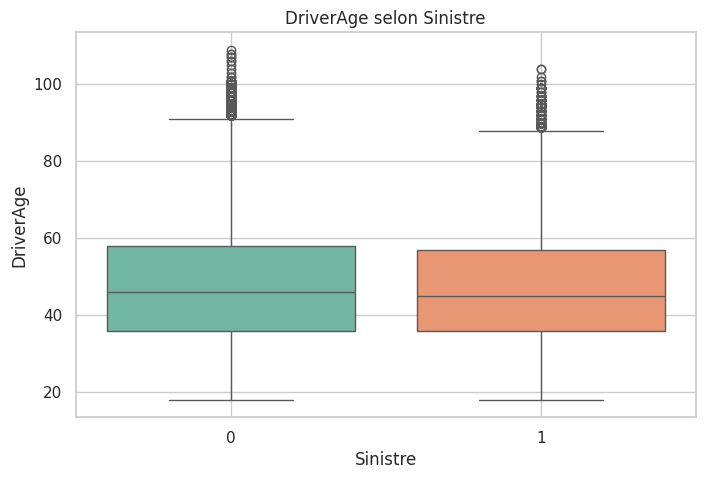

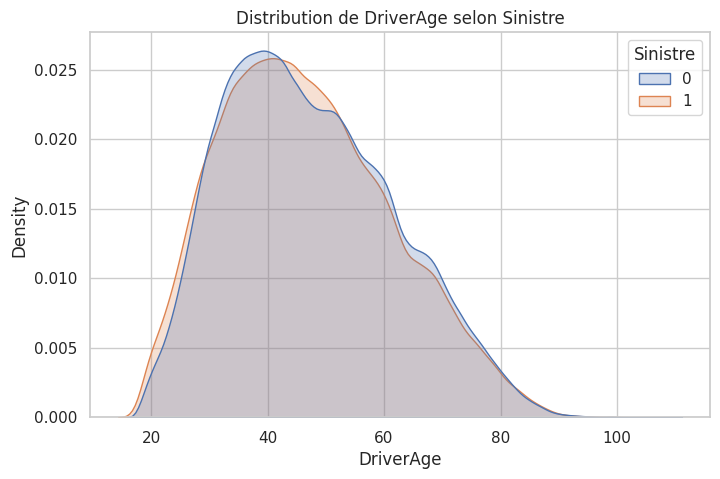

KeyboardInterrupt: 

In [ ]:
#STATS DE LA BASE CONCATÉNER 
# Liste des variables
vars_num = ['Exposure', 'Power', 'DriverAge', 'Density']
vars_cat = ['Fuel_type', 'Sex']


afficher_repartition_sinistres(data)
# Analyse automatique
for var in vars_num:
    analyse_variable_numerique(data, var)

for var in vars_cat:
    analyse_variable_categorielle(data, var)

#Corrélation 
afficher_correlation(data, vars_num)
results = analyze_categorical_correlation(data)

# Base française 

In [ ]:
# Liste des variables
vars_num = ['Exposure', 'Power', 'DriverAge', 'Density']
vars_cat = ['Fuel_type', 'Sex']


afficher_repartition_sinistres(df_freMTPL)
# Analyse automatique
for var in vars_num:
    analyse_variable_numerique(df_freMTPL, var)

for var in vars_cat:
    analyse_variable_categorielle(df_freMTPL, var)

#Corrélation 
afficher_correlation(df_freMTPL, vars_num)
results = analyze_categorical_correlation(df_freMTPL)

# Base européenne 

In [ ]:
# Liste des variables
vars_num = ['Exposure', 'Power', 'DriverAge', 'Density']
vars_cat = ['Fuel_type', 'Sex']


afficher_repartition_sinistres(df_euMTPL)
# Analyse automatique
for var in vars_num:
    analyse_variable_numerique(df_euMTPL, var)

for var in vars_cat:
    analyse_variable_categorielle(df_euMTPL, var)

#Corrélation 
afficher_correlation(df_euMTPL, vars_num)
results = analyze_categorical_correlation(df_euMTPL)

# Base belge

In [ ]:
# Liste des variables
vars_num = ['Exposure', 'Power', 'DriverAge', 'Density']
vars_cat = ['Fuel_type', 'Sex']


afficher_repartition_sinistres(df_beMTPL)
# Analyse automatique
for var in vars_num:
    analyse_variable_numerique(df_beMTPL, var)

for var in vars_cat:
    analyse_variable_categorielle(df_beMTPL, var)

#Corrélation 
afficher_correlation(df_beMTPL, vars_num)
results = analyze_categorical_correlation(df_beMTPL)